# Classification with Neural Network

A neural network uses the pre-trained ResNet50 as fixed features extractor. The last convolutional output of the pre-trained models, the bottleneck features, is fed as input to our model. The number of training, validation and test tensors is 176,131, 29,355, 29,356, respectively.


## 1. Load Tensors and Targets

The training, validation and test tensors along with the associated targets are loaded. 

In [2]:
import numpy as np
from common import *

bottleneck_features = np.load('data/bottleneck_features/yelp_resnet50_all.npz')
train_resnet50 = bottleneck_features['train_features']
valid_resnet50 = bottleneck_features['valid_features']
test_resnet50 = bottleneck_features['test_features']

train_targets = bottleneck_features['train_targets']
valid_targets = bottleneck_features['valid_targets']
test_targets = bottleneck_features['test_targets']

## 2. Architecture

In [3]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, MaxPooling2D 
from keras.layers import Conv2D, Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.regularizers import l2

resnet50 = Sequential()
resnet50.add(GlobalAveragePooling2D(input_shape=train_resnet50.shape[1:]))

resnet50.add(Dense(1024, activation='relu', kernel_regularizer=l2(1e-4)))
resnet50.add(BatchNormalization())
resnet50.add(Dropout(0.3))

resnet50.add(Dense(512, activation='relu', kernel_regularizer=l2(1e-4)))
resnet50.add(BatchNormalization())
resnet50.add(Dropout(0.3))

resnet50.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
resnet50.add(BatchNormalization())

resnet50.add(Dense(9, activation='sigmoid'))

resnet50.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

## 3. Compilation and Minimization

In [4]:
from keras.optimizers import SGD

sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
resnet50.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpointer = ModelCheckpoint(filepath='data/saved_models/weights_resnet50.hdf5', save_best_only=True)
checkimprovement = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

history_resnet50 = resnet50.fit(train_resnet50, train_targets, 
                                validation_data=(valid_resnet50,valid_targets), 
                                epochs=1000, batch_size=64, verbose=1,
                                callbacks=[checkpointer,checkimprovement])

Train on 176131 samples, validate on 29355 samples
Epoch 1/1000
176131/176131 [==============================] - 28s 156us/step - loss: 0.9976 - acc: 0.5819 - val_loss: 0.8558 - val_acc: 0.6634
Epoch 2/1000
176131/176131 [==============================] - 28s 156us/step - loss: 0.9069 - acc: 0.6450 - val_loss: 0.8130 - val_acc: 0.6995
Epoch 3/1000
176131/176131 [==============================] - 28s 156us/step - loss: 0.8654 - acc: 0.6730 - val_loss: 0.7897 - val_acc: 0.7176
Epoch 4/1000
176131/176131 [==============================] - 28s 156us/step - loss: 0.8382 - acc: 0.6899 - val_loss: 0.7741 - val_acc: 0.7279
Epoch 5/1000
176131/176131 [==============================] - 28s 159us/step - loss: 0.8181 - acc: 0.7024 - val_loss: 0.7619 - val_acc: 0.7360
Epoch 6/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.8031 - acc: 0.7110 - val_loss: 0.7527 - val_acc: 0.7415
Epoch 7/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.7916

Epoch 114/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.6638 - acc: 0.7781 - val_loss: 0.6594 - val_acc: 0.7813
Epoch 115/1000
176131/176131 [==============================] - 28s 158us/step - loss: 0.6631 - acc: 0.7788 - val_loss: 0.6592 - val_acc: 0.7813
Epoch 116/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.6627 - acc: 0.7786 - val_loss: 0.6588 - val_acc: 0.7816
Epoch 117/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.6624 - acc: 0.7792 - val_loss: 0.6586 - val_acc: 0.7815
Epoch 118/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.6626 - acc: 0.7788 - val_loss: 0.6583 - val_acc: 0.7816
Epoch 119/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.6622 - acc: 0.7787 - val_loss: 0.6577 - val_acc: 0.7819
Epoch 120/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.6616 - acc: 0.7791 - val_loss: 0.6577 - v

176131/176131 [==============================] - 28s 158us/step - loss: 0.6216 - acc: 0.7936 - val_loss: 0.6324 - val_acc: 0.7873
Epoch 227/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.6210 - acc: 0.7938 - val_loss: 0.6324 - val_acc: 0.7874
Epoch 228/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.6205 - acc: 0.7943 - val_loss: 0.6321 - val_acc: 0.7875
Epoch 229/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.6200 - acc: 0.7945 - val_loss: 0.6318 - val_acc: 0.7875
Epoch 230/1000
176131/176131 [==============================] - 28s 156us/step - loss: 0.6197 - acc: 0.7947 - val_loss: 0.6318 - val_acc: 0.7873
Epoch 231/1000
176131/176131 [==============================] - 28s 157us/step - loss: 0.6197 - acc: 0.7945 - val_loss: 0.6315 - val_acc: 0.7875
Epoch 232/1000
176131/176131 [==============================] - 28s 158us/step - loss: 0.6194 - acc: 0.7943 - val_loss: 0.6315 - val_acc: 0.7874


176131/176131 [==============================] - 28s 156us/step - loss: 0.5865 - acc: 0.8062 - val_loss: 0.6170 - val_acc: 0.7901
Epoch 339/1000
176131/176131 [==============================] - 28s 156us/step - loss: 0.5859 - acc: 0.8072 - val_loss: 0.6169 - val_acc: 0.7902
Epoch 340/1000
176131/176131 [==============================] - 27s 156us/step - loss: 0.5863 - acc: 0.8065 - val_loss: 0.6169 - val_acc: 0.7902
Epoch 341/1000
176131/176131 [==============================] - 28s 156us/step - loss: 0.5856 - acc: 0.8071 - val_loss: 0.6171 - val_acc: 0.7900
Epoch 342/1000
176131/176131 [==============================] - 28s 156us/step - loss: 0.5857 - acc: 0.8069 - val_loss: 0.6167 - val_acc: 0.7900
Epoch 343/1000
176131/176131 [==============================] - 28s 158us/step - loss: 0.5850 - acc: 0.8075 - val_loss: 0.6164 - val_acc: 0.7901
Epoch 344/1000
176131/176131 [==============================] - 28s 161us/step - loss: 0.5849 - acc: 0.8073 - val_loss: 0.6162 - val_acc: 0.7902


The values of the loss function and the accuracy metric across epochs are plotted below for the training (blue) and validation (red) data.

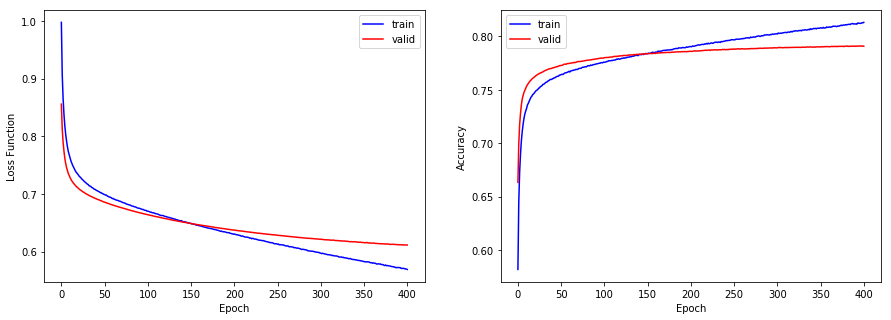

In [7]:
history(history_resnet50)

The best model, i.e, the one with the lowest value of the loss function calculated on the validation data, is loaded.

In [8]:
resnet50.load_weights('data/saved_models/weights_resnet50.hdf5')
resnet50.save('data/saved_models/model_resnet50.hdf5')

## 4. $F_1$ score

Predictions are made on the test data and the $F_1$ score is then calculated.

In [9]:
resnet50_predictions = (resnet50.predict(test_resnet50) >= 0.5).astype(int)

In [10]:
resnet50_score = f1_score(test_targets, resnet50_predictions)
print('F1 score: %.5f' % resnet50_score)

F1 score: 0.80301
